In [1]:
import biotsavart as bs
import matplotlib.pyplot as plt
import numpy as np

In [4]:
mu0 = np.pi*4e-7
I = 1.
R = 1.
lp = bs.Loop.square(2)

x = np.linspace(-5, 5, 501)
pnts = bs.ObsPoint(x=x, y=x)
r_obs = pnts.xyz

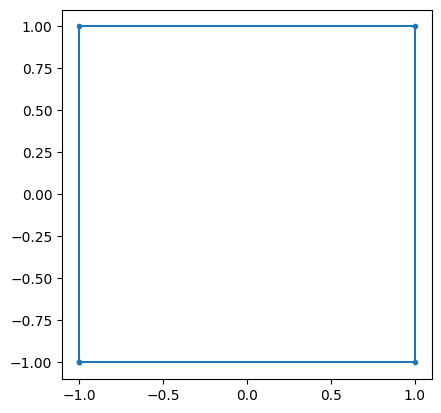

In [5]:
fig,ax = plt.subplots()
ax.plot(lp.x, lp.y, '.-')
ax.set_aspect('equal')

In [9]:
lpxyz = lp.xyz
bz1 = bs.calc_bfield(lpxyz, r_obs, I=I)[..., 2]

distortion = np.random.randn(len(lpxyz))*0.25
distortion[-1] = distortion[0]
lpxyz[..., 2] += distortion

bz2 = bs.calc_bfield(lpxyz, r_obs, I=I)[..., 2]

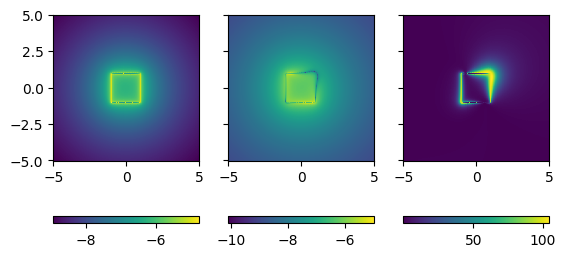

In [10]:
fig,axs = plt.subplots(1,3, sharex=True, sharey=True)
pcm=axs[0].pcolor(pnts.x, pnts.y, np.log10(np.abs(bz1)))
plt.colorbar(pcm, ax=axs[0], orientation='horizontal')

pcm=axs[1].pcolor(pnts.x, pnts.y, np.log10(np.abs(bz2)))
plt.colorbar(pcm, ax=axs[1], orientation='horizontal')
pcm = axs[2].pcolor(pnts.x, pnts.y, 100*np.abs(bz2-bz1)/np.abs(bz1))
plt.colorbar(pcm, ax=axs[2], orientation='horizontal')
for ax in axs: ax.set_aspect('equal')